In [1]:
import tensorflow as tf
import cv2 
import os
import matplotlib.pyplot as plt
import numpy as np


In [2]:
img_array = cv2.imread("Train/angry/Training_3908.jpg")

In [3]:
img_array.shape #rgb de la imagen

(48, 48, 3)

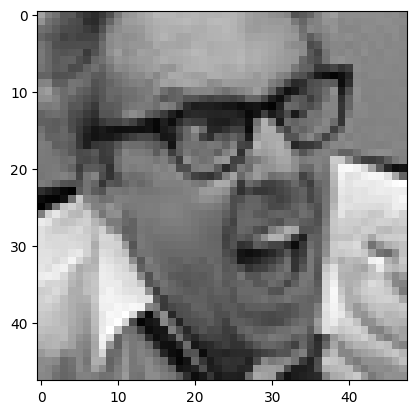

In [4]:
plt.imshow(img_array) ##BGR

In [5]:
Data = "train/" #dataset
Classes = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]

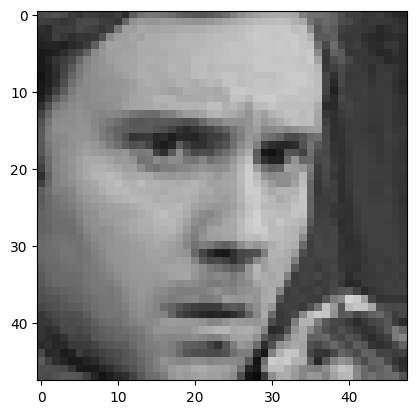

In [6]:
for category in Classes:
    path = os.path.join(Data, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break #Se hizo el break para mostrar que el codigo si sirve por motivos de que mi compu no aguanta tanta imagen jajajjaja 
    break

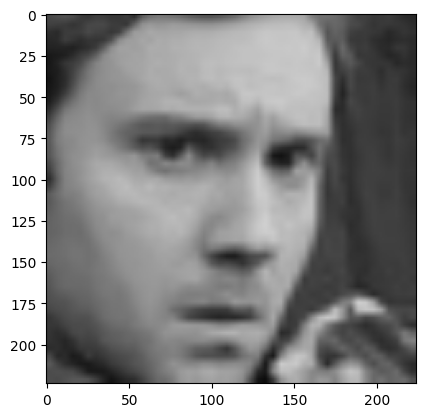

In [7]:
img_size = 224 # ImageNet 224x224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

### Leer las imagenes y convertirlas en array

In [8]:
DataPath = "train"  
DataTraining = []  
# limit_per_category = 250

def create_training_Data():
    for category in Classes:
        path = os.path.join(DataPath, category)
        class_num = Classes.index(category)
        count = 0
        for img in os.listdir(path):
            # if count >= limit_per_category:
            #     break
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                DataTraining.append([new_array, class_num])
                count += 1
            except Exception as e:
                pass


In [9]:
create_training_Data()

In [10]:
print(len(DataTraining))

54325


In [11]:
import random 
random.shuffle(DataTraining)

In [12]:
X = []
y = []

for features, label in DataTraining:
    X.append(features)
    y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) # Convirtinedo a una 4 dimension


In [13]:
X.shape 

(54325, 224, 224, 3)

In [14]:
#y la que normaliza
X = X/255.0;  #se convirtio a float 32 que le quita precision pero usa la mitad de la memoria
 

### Deep Learning model for training - Transfer Learning

In [15]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [16]:
model = tf.keras.applications.MobileNetV2() #Modelo pre entrenado

In [17]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

### Tuneando ando

In [18]:
base_input = model.layers[0].input

In [19]:
base_output = model.layers[-2].output

In [20]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [21]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [22]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [23]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [24]:
y[700]

2

In [25]:

y = np.array(y)


print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X: (54325, 224, 224, 3)
Shape of y: (54325,)


In [26]:
new_model.fit(X,y, epochs = 25)

In [ ]:
new_model.save('modelito.h5')

NameError: name 'new_model' is not defined

In [ ]:
new_model = tf.keras.models.load_model('modelito.h5')

In [ ]:
frame = cv2.imread("happyboy.jpg")

In [ ]:
frame.shape

(1440, 2160, 3)

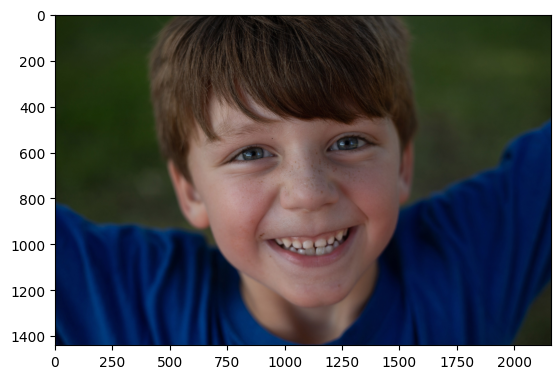

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [ ]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

NameError: name 'gray' is not defined

In [ ]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 , 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face not detected")
    else:
        for(ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

In [ ]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

NameError: name 'plt' is not defined

In [ ]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis=0)
final_image = final_image/255.0

In [ ]:
predictions = new_model.predict(final_image)

1/1 [==============================] - 3s 3s/step


In [ ]:
predictions[0]

array([1.2848171e-08, 9.2781956e-16, 6.4277592e-09, 9.9999869e-01,
       1.2729782e-06, 4.2889408e-08, 4.3948482e-08], dtype=float32)

In [ ]:
import cv2

emotion_dict = {0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 4: "Sad", 5: "Surprise", 6: "Neutral"}

path = "haarscade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

#SETEAR A BLANCO EL FONDO

rectangle_bgr = (255, 255, 255)
img = np.zeros((500, 500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=1.5, thickness=2)[0]
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0, 0, 0), thickness=1)


cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w, y+h), (255, 0 , 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("Face not detected")
        else:
            for(ex, ey, ew, eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0)
    final_image = final_image/255.0
    font = cv2.FONT_HERSHEY_SIMPLEX
    Predictions = new_model.predict(final_image)
    emotion_index = np.argmax(Predictions)
    status = emotion_dict.get(emotion_index, "Unknown")

    # Draw black background rectangle
    x1, y1, w1, h1 = 0, 0, 175, 75
    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0, 0, 0), -1)

    # Add text
    cv2.putText(frame, status, (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    cv2.putText(frame, status, (100, 150), font, 3, (0, 0, 255), 2, cv2.LINE_4)

    # Draw rectangle around the face
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 0, 255))

    # Display the frame
    cv2.imshow('Emotion Detector', frame)

    # Break the loop with a key press
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break

# Release the webcam and close all OpenCV windows
cap.release()
cv2.destroyAllWindows()

NameError: name 'np' is not defined